In [9]:
import cudf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from pandas_profiling import ProfileReport
pd.options.display.max_columns = None

In [2]:
sys.path.append(os.path.abspath(".."))
from src.utils import plot_venn2

In [3]:
train = cudf.read_feather("../input/train.ftr")
train.head()

/home/karunru/.pyenv/versions/miniconda3-4.7.12/envs/rapids-0.16/lib/python3.7/site-packages/cudf/io/feather.py:16: UserWarning: Using CPU via PyArrow to read feather dataset, this may be GPU accelerated in the future
  "Using CPU via PyArrow to read feather dataset, this may "


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
1,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
2,LEGO Batman: The Videogame,PSP,<NA>,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
3,Combat,2600,<NA>,Action,Atari,117,7,0,1,125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+


In [4]:
test = cudf.read_feather("../input/test.ftr")
test.head()

/home/karunru/.pyenv/versions/miniconda3-4.7.12/envs/rapids-0.16/lib/python3.7/site-packages/cudf/io/feather.py:16: UserWarning: Using CPU via PyArrow to read feather dataset, this may be GPU accelerated in the future
  "Using CPU via PyArrow to read feather dataset, this may "


,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Hitman 2: Silent Assassin,XB,<NA>,Action,Eidos Interactive,84.0,23.0,8,19.0,Io Interactive,M
1,Legacy of Kain: Soul Reaver,PS,<NA>,Action,Eidos Interactive,91.0,17.0,9,132.0,Crystal Dynamics,T
2,Metal Gear Solid 2: Substance,XB,<NA>,Action,Konami Digital Entertainment,87.0,28.0,8.5,39.0,KCEJ,M
3,Silent Hill: Homecoming,X360,<NA>,Action,Konami Digital Entertainment,70.0,54.0,6.9,180.0,Double Helix Games,M
4,Silent Hill: Homecoming,PS3,<NA>,Action,Konami Digital Entertainment,71.0,41.0,6.9,143.0,Double Helix Games,M


In [7]:
(train["NA_Sales"] + train["EU_Sales"] + train["JP_Sales"] + train["Other_Sales"] == train["Global_Sales"]).mean()

0.6942217968656538

<AxesSubplot:>

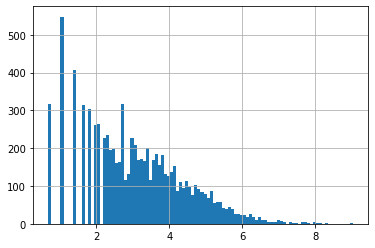

In [59]:
np.log1p(train["Global_Sales"].to_pandas()).hist(bins=100)

<AxesSubplot:>

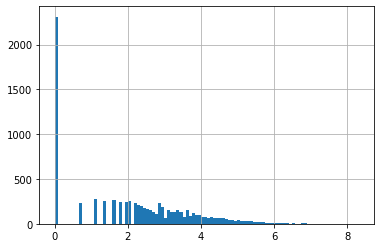

In [10]:
np.log1p(train["NA_Sales"].to_pandas()).hist(bins=100)

<AxesSubplot:>

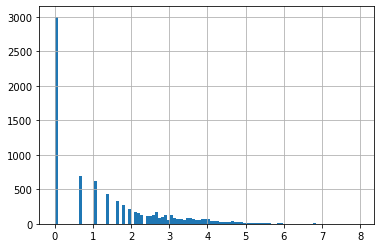

In [11]:
np.log1p(train["EU_Sales"].to_pandas()).hist(bins=100)

<AxesSubplot:>

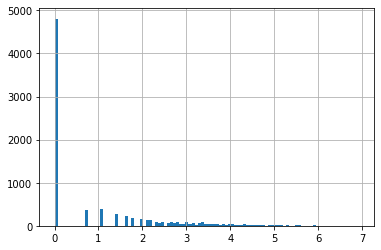

In [12]:
np.log1p(train["JP_Sales"].to_pandas()).hist(bins=100)

<AxesSubplot:>

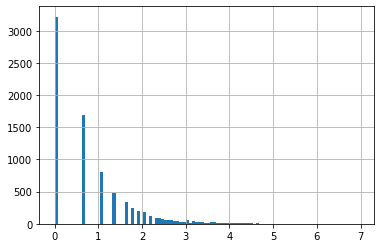

In [13]:
np.log1p(train["Other_Sales"].to_pandas()).hist(bins=100)

In [17]:
train["Other_Sales_2"] = train["Global_Sales"] - (train["NA_Sales"] + train["EU_Sales"] + train["JP_Sales"] + train["Other_Sales"])

In [18]:
train["Other_Sales_2"].describe()

count    8359.000000
mean        0.034215
std         0.572795
min        -2.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Other_Sales_2, dtype: float64

In [20]:
(train["Other_Sales_2"] < 0).mean()

0.13637994975475534

In [21]:
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Other_Sales_2
0,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,180,97,0,28,306,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,1
1,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,LucasArts,151,61,0,21,234,78.0,22.0,6.6,28.0,Traveller's Tales,E10+,1
2,LEGO Batman: The Videogame,PSP,<NA>,Action,Warner Bros. Interactive Entertainment,56,44,0,27,128,73.0,5.0,7.4,10.0,Traveller's Tales,E10+,1
3,Combat,2600,<NA>,Action,Atari,117,7,0,1,125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,69,42,0,12,124,76.0,8.0,7.8,13.0,Traveller's Tales,E10+,1


In [22]:
train.select_dtypes("object").columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')

In [23]:
train["User_Score"].unique()

0     <NA>
1        0
2      0.5
3      0.6
4      0.9
      ... 
84     9.3
85     9.4
86     9.5
87     9.7
88     tbd
Name: User_Score, Length: 89, dtype: object

In [54]:
test["User_Score"].unique()

0     <NA>
1      0.2
2      0.3
3      0.5
4      0.6
      ... 
90     9.3
91     9.4
92     9.5
93     9.6
94     tbd
Name: User_Score, Length: 95, dtype: object

In [55]:
train["User_Score"].replace(to_replace="tbd", value=np.nan).

0     <NA>
1        0
2      0.5
3      0.6
4      0.9
      ... 
83     9.2
84     9.3
85     9.4
86     9.5
87     9.7
Name: User_Score, Length: 88, dtype: object

In [24]:
cat_cols = [
    'Name',
    'Platform',
    "Year_of_Release",
    'Genre',
    'Publisher',
    'Developer',
    'Rating'
]

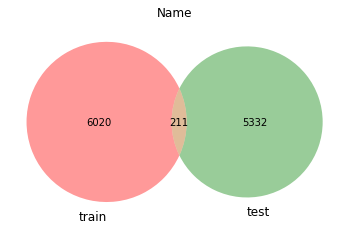

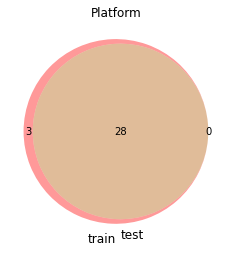

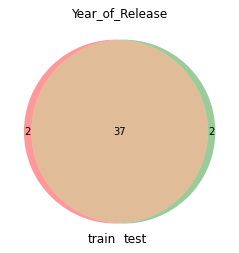

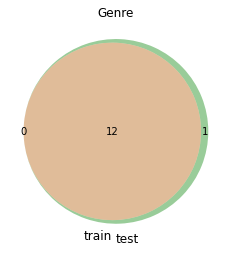

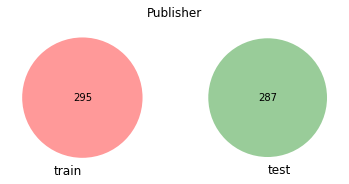

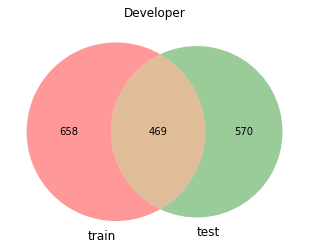

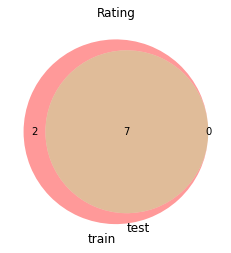

In [25]:
for col in cat_cols:
    set_train, set_test = plot_venn2(train, test, col)

In [27]:
set(train["Name"].unique().to_pandas()) & set(test["Name"].unique().to_pandas())

{'2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe',
 '428: Fuusa Sareta Shibuya de',
 '4x4 EVO 2',
 "A Bug's Life",
 'ATV: Quad Power Racing',
 'Agatha Christie: The ABC Murders',
 'Alan Wake',
 'Alien Hominid',
 'Alvin and the Chipmunks',
 'Amagami',
 "America's Next Top Model",
 'Aquaman: Battle for Atlantis',
 'Arcana Heart 3',
 'Army Men: RTS',
 'Backyard Baseball',
 'Backyard NFL Football',
 'Balloon Pop',
 'Barbie Horse Adventures: Wild Horse Rescue',
 'Bejeweled 3',
 'Bionicle',
 'Blazblue: Continuum Shift Extend',
 'Bomberman',
 'Bomberman Land',
 'Bookworm',
 'Breath of Fire II',
 "Cabela's Big Game Hunter",
 "Cabela's Big Game Hunter (2008)",
 "Cabela's Dangerous Hunts 2009",
 'Casper',
 'Clannad',
 'Clash of Elementalists',
 'Cocoto Kart Racer',
 'College Hoops 2K6',
 'Command & Conquer',
 'Commando',
 'Crazy Taxi',
 'Danganronpa 2: Goodbye Despair',
 'Danganronpa: Trigger Happy Havoc',
 'Darksiders II',
 'Dead or Alive 2',
 'Dead or Alive 5',
 'Deer Drive',
 'Def

In [28]:
set(train["Platform"].unique().to_pandas()) - set(test["Platform"].unique().to_pandas())

{'GG', 'PCFX', 'SCD'}

In [30]:
train["Platform"].unique()

0     2600
1      3DO
2      3DS
3       DC
4       DS
5       GB
6      GBA
7       GC
8      GEN
9       GG
10     N64
11     NES
12      NG
13      PC
14    PCFX
15      PS
16     PS2
17     PS3
18     PS4
19     PSP
20     PSV
21     SAT
22     SCD
23    SNES
24    TG16
25      WS
26     Wii
27    WiiU
28    X360
29      XB
30    XOne
Name: Platform, dtype: object

[GG](https://ja.wikipedia.org/wiki/%E3%82%B2%E3%83%BC%E3%83%A0%E3%82%AE%E3%82%A2), [PCFX](https://ja.wikipedia.org/wiki/PC-FX), [SCD](https://ja.wikipedia.org/wiki/%E3%83%A1%E3%82%ACCD)

In [31]:
set(train["Year_of_Release"].unique().to_pandas()) - set(test["Year_of_Release"].unique().to_pandas())

{nan, 2017.0}

In [36]:
train.query("Year_of_Release == 2017.0")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Other_Sales_2
8356,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,1,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
8357,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,4,0,4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
8358,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,1,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [32]:
set(test["Year_of_Release"].unique().to_pandas()) - set(train["Year_of_Release"].unique().to_pandas())

{nan, 2020.0}

In [35]:
test.query("Year_of_Release == 2020.0")

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8359,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,<NA>,<NA>,tbd,<NA>,Ubisoft,E


In [53]:
train["Year_of_Release"].max()

2017.0

In [57]:
test["Year_of_Release"].replace(to_replace=2020.0, value=2017.0).max()

2017.0

In [33]:
set(test["Genre"].unique().to_pandas()) - set(train["Genre"].unique().to_pandas())

{None}

In [41]:
train["Genre"].unique()

0           Action
1        Adventure
2         Fighting
3             Misc
4         Platform
5           Puzzle
6           Racing
7     Role-Playing
8          Shooter
9       Simulation
10          Sports
11        Strategy
Name: Genre, dtype: object

In [34]:
set(train["Rating"].unique().to_pandas()) - set(test["Rating"].unique().to_pandas())

{'AO', 'EC'}

In [42]:
train["Rating"].unique()

0    <NA>
1      AO
2       E
3    E10+
4      EC
5     K-A
6       M
7      RP
8       T
Name: Rating, dtype: object

In [44]:
train["Rating"].value_counts()

E       1880
T       1404
M        772
E10+     731
EC         8
AO         1
K-A        1
RP         1
Name: Rating, dtype: int32

In [45]:
test["Rating"].value_counts()

E       2111
T       1557
M        791
E10+     689
K-A        2
RP         2
Name: Rating, dtype: int32

In [47]:
train["Rating"].isna().sum()

3561

In [48]:
test["Rating"].isna().sum()

3208

In [51]:
rating_dict = {
    "RP": 0,
    "EC": 1,
    "K-A": 2,
    "E": 2,
    "E10+": 3,
    "T": 4,
    "M": 5,
    "AO": 5,
}
train["Rating"] = train["Rating"].replace(rating_dict).astype(int)

In [52]:
train["Rating"]

0          3
1          3
2          3
3       <NA>
4          3
        ... 
8354    <NA>
8355    <NA>
8356    <NA>
8357    <NA>
8358    <NA>
Name: Rating, Length: 8359, dtype: int64

In [58]:
np.int(1 + np.log2(len(train)))

14

<AxesSubplot:>

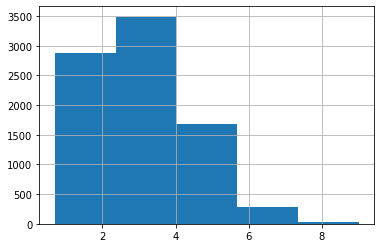

In [60]:
np.log1p(train["Global_Sales"].to_pandas()).hist(bins=5)

<AxesSubplot:>

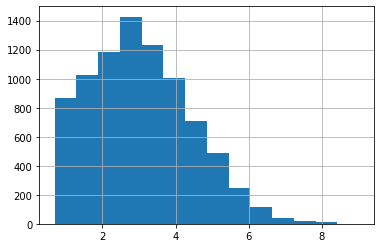

In [61]:
np.log1p(train["Global_Sales"].to_pandas()).hist(bins=14)

In [65]:
np.log1p(train["Global_Sales"].to_pandas()).quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10    1.098612
0.25    1.945910
0.50    2.944439
0.75    3.951244
0.90    4.943066
Name: Global_Sales, dtype: float64

<AxesSubplot:>

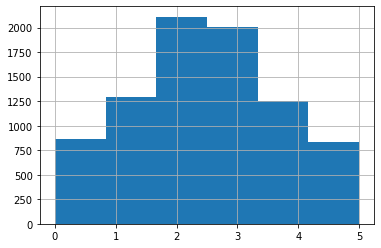

In [71]:
pd.qcut(np.log1p(train["Global_Sales"].to_pandas()), q=[0.0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0], labels=False).hist(bins=6)